In [1]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

https://www.kaggle.com/datasets/shivam2503/diamonds/data

The Diamonds dataset includes nearly 54,000 real diamond records with 10 features.

price – The diamond’s cost in US dollars.

carat – The weight of the diamond.

cut – The quality of the diamond’s cut. (Fair, Good, Very Good, Premium, Ideal)

color – The color grade of the diamond (D is best, J is worst).

clarity – How clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x – The diamond’s length in millimeters.

y – The diamond’s width in millimeters.

z – The diamond’s depth in millimeters.

depth – The total depth percentage of the diamond.

table – The size of the top surface of the diamond relative to its width.


Target variable: (df['price'])

In [2]:
#load data
df = pd.read_csv("C:\\Users\\mm00548\\Downloads\\diamonds.csv\\diamonds.csv")
print (df.shape) # size of dat
print(df.columns) #print columns/features
df.head(10) #show first 10 rows

(53940, 11)
Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.info() # show datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df = df.drop(columns=['Unnamed: 0']) # remove unique key

In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
zero_counts = (df.select_dtypes(include=['number']) == 0).sum() # check zero
print(zero_counts)

carat     0
depth     0
table     0
price     0
x         8
y         7
z        20
dtype: int64


In [8]:
df[['x','y','z']] = df[['x','y','z']].replace(0, np.nan) #replace 0 to null
df = df.dropna(subset=['x','y','z']) # drop null

In [9]:
#feature selection - check correlation
corr_numerical = df.select_dtypes(include=['number']).corr()
print(corr_numerical)

          carat     depth     table     price         x         y         z
carat  1.000000  0.028259  0.181646  0.921592  0.977779  0.953991  0.961048
depth  0.028259  1.000000 -0.295733 -0.010729 -0.025017 -0.029069  0.095023
table  0.181646 -0.295733  1.000000  0.127245  0.196097  0.184493  0.152483
price  0.921592 -0.010729  0.127245  1.000000  0.887231  0.867864  0.868206
x      0.977779 -0.025017  0.196097  0.887231  1.000000  0.974918  0.975435
y      0.953991 -0.029069  0.184493  0.867864  0.974918  1.000000  0.956744
z      0.961048  0.095023  0.152483  0.868206  0.975435  0.956744  1.000000


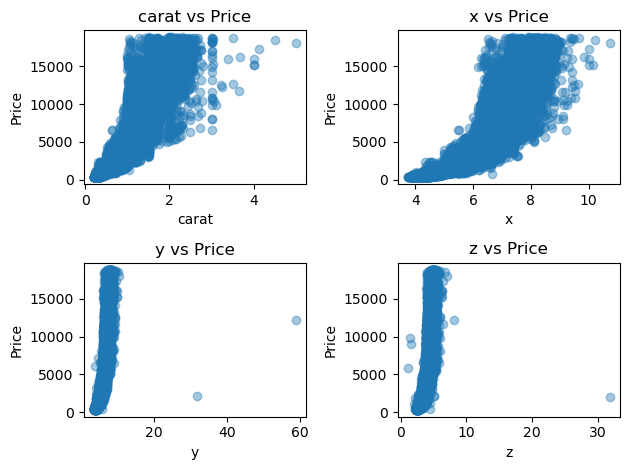

In [10]:
high_corr_features = ['carat', 'x', 'y', 'z',]

for i, feature in enumerate(high_corr_features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[feature], df['price'], alpha=0.4)
    plt.title(f"{feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Price")

plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

#loop categorical features to become encodeed (assigns i to each string value)
for col in ['cut','color','clarity']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
print(df.head(3))

   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31


In [12]:
corr = df.corr()
corr

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017193,0.291360,-0.214227,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
cut,0.017193,1.000000,0.000253,0.028196,-0.194309,0.150708,0.039889,0.022007,0.027305,0.001678
color,0.291360,0.000253,1.000000,-0.027689,0.047373,0.026481,0.172431,0.270671,0.263915,0.270011
clarity,-0.214227,0.028196,-0.027689,1.000000,-0.053200,-0.088028,-0.071570,-0.225963,-0.217730,-0.226215
depth,0.028259,-0.194309,0.047373,-0.053200,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,0.150708,0.026481,-0.088028,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,0.039889,0.172431,-0.071570,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,0.022007,0.270671,-0.225963,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,0.027305,0.263915,-0.217730,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.001678,0.270011,-0.226215,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


In [13]:
#selected features
X = df[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']]
y = df['price'] # target var

#split data - 80% training 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape)  #2D
print(y_train.shape)

(43136, 7)
(43136,)


In [15]:
from xgboost import XGBRegressor

#regression mode
xgb = XGBRegressor(
    n_estimators=500,      # num of decision trees
    learning_rate=0.05,    # how fast model learns
    max_depth=6,           #depth of each tree
    subsample=0.8,         #% of samples, per tree
    colsample_bytree=0.8,  #% of features, per tree
    random_state=42
)

# train model
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [16]:

# R^2
print("XGBoost R-Squared:", xgb.score(X_test, y_test))

# Predictions on test data
y_pred_xgb = xgb.predict(X_test)

# RMSE calculation (root mean squared error- how far off)
from sklearn.metrics import mean_squared_error
import numpy as np

xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", xgb_rmse)

# Predict data
prediction = xgb.predict([[0.23, 2, 1, 3, 3.95, 3.98, 2.43]])
print("Prediction for new diamond:", prediction) #98% 


XGBoost R-Squared: 0.9825946688652039
XGBoost RMSE: 528.2435429945484
Prediction for new diamond: [317.15994]


In [17]:
#Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

dt = DecisionTreeRegressor(
    random_state=42, 
    )

dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_r2 = r2_score(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))

print("Decision Tree R²:", dt_r2)
print("Decision Tree RMSE:", dt_rmse)
print("First Decision Tree prediction:", dt_pred[0])

Decision Tree R²: 0.965119830192405
Decision Tree RMSE: 747.7948706515596
First Decision Tree prediction: 1155.0


In [18]:
from sklearn.neighbors import KNeighborsRegressor

# train KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

#prediction
knn_pred = knn.predict(X_test)

# r-squared and rmse
knn_r2 = r2_score(y_test, knn_pred)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))

print("KNN R²:", knn_r2)
print("KNN RMSE:", knn_rmse)
print("First Decision Tree prediction:", knn_pred[0])

KNN R²: 0.9744636105599511
KNN RMSE: 639.8422780750851
First Decision Tree prediction: 965.4


In [19]:
import pickle

#save model
pickle.dump(xgb, open("XGBmodel.pkl", "wb"))

In [20]:
#load and test
XGB_model = pickle.load(open('XGBmodel.pkl', "rb"))

#prediction
prediction = xgb.predict([[0.23, 2, 1, 3, 3.95, 3.98, 2.43]])
print("Prediction:", prediction)

Prediction: [317.15994]
